In [14]:
from PIL import Image
import matplotlib.pyplot as plt


In [15]:
!pip install opencv-python

^C


In [ ]:
import cv2

In [ ]:
import os
cwd = os.getcwd()
cwd 


'c:\\Users\\Aditya\\knitsmart'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


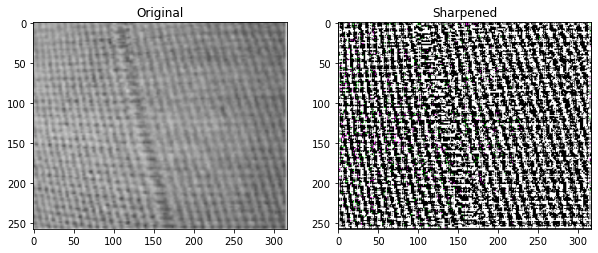

In [ ]:
import cv2 
image=cv2.imread(r"c:\Users\Aditya\OneDrive\Pictures\Screenshots\Screenshot 2024-06-13 103152.png")
sharpened_image= cv2.Laplacian(image, cv2.CV_64F)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')

plt.subplot(122)
plt.imshow(sharpened_image)
plt.title('Sharpened')
plt.show()

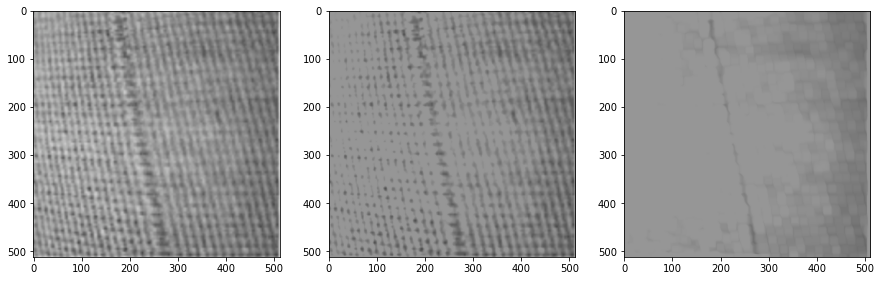

In [ ]:
import cv2
import numpy as np
from scipy.signal import convolve2d, fftconvolve

def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()
# Example usage
image = cv2.imread(r'c:\Users\Aditya\OneDrive\Pictures\Screenshots\Screenshot 2024-06-13 103152.png')  # Load a grayscale image
image=cv2.resize(image,(512,512),interpolation=cv2.INTER_CUBIC)

#image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) 

# Adjust the hue, saturation, and value of the image 
# Adjusts the hue by multiplying it by 0.7 
#image[:, :, 0] = image[:, :, 0] * 0.7
# Adjusts the saturation by multiplying it by 1.5 
#image[:, :, 1] = image[:, :, 1] * 1.5
# Adjusts the value by multiplying it by 0.5 
#image[:, :, 2] = image[:, :, 2] * 0.5
# Convert the image back to BGR color space 
#image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
max_intensity=200

_, reduced_brightness = cv2.threshold(image, 150, 220, cv2.THRESH_TRUNC)

#blurred = cv2.blur(reduced_brightness, (15,15)) 
#blurred = cv2.blur(reduced_brightness, (15,15)) 
blurred = cv2.medianBlur(reduced_brightness, 15) 

kernel = np.ones((9, 9), np.uint8) 


# dilate the image 
blurred = cv2.dilate(blurred, kernel, iterations=1) 


#blurred = cv2.GaussianBlur(image, (25, 25), 0) 
'''
import cv2 
import matplotlib.pyplot as plt 





histr = cv2.calcHist([blurred], 
						[0], None, 
						[256], 
						[0, 256]) 
	
plt.plot(histr, color = 'red') 
	
	# Limit X - axis to 256 
plt.xlim([0, 256]) 
	
plt.show() 

# Negate the original image 
img_neg = 0 - blurred

plt.imshow(img_neg) 
plt.show() 
'''
# Histogram plotting of 
# negative transformed image 



# Display the result
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(image,cmap='gray')

plt.subplot(132)
plt.imshow(reduced_brightness,cmap='gray')

plt.subplot(133)
plt.imshow(blurred,cmap='gray')
plt.show()

def detector(image1,image2):
    # creating ORB detector
    detect = cv2.ORB_create()
 
    # finding key points and descriptors of both images using detectAndCompute() function
    key_point1,descrip1 = detect.detectAndCompute(image1,None)
    key_point2,descrip2 = detect.detectAndCompute(image2,None)
    return (key_point1,descrip1,key_point2,descrip2)
 



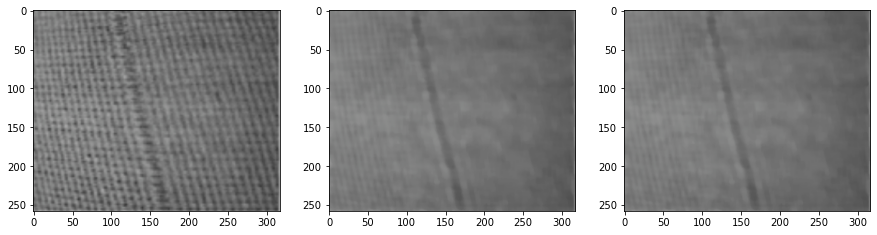

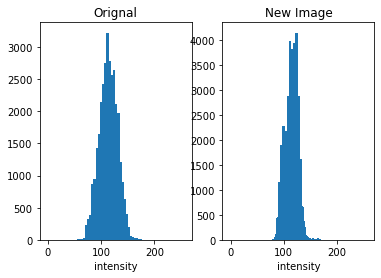

In [ ]:
import cv2
import numpy as np
from scipy.signal import convolve2d, fftconvolve

def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)

    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out   
# Example usage
image = cv2.imread(r'c:\Users\Aditya\OneDrive\Pictures\Screenshots\Screenshot 2024-06-13 103152.png')  # Load a grayscale image

image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) 
  
# Adjust the hue, saturation, and value of the image 
# Adjusts the hue by multiplying it by 0.7 
image[:, :, 0] = image[:, :, 0] * 0.7
# Adjusts the saturation by multiplying it by 1.5 
image[:, :, 1] = image[:, :, 1] * 1.5
# Adjusts the value by multiplying it by 2
image[:, :, 2] = image[:, :, 2] * 0.8
  
# Convert the image back to BGR color space 
image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
blurred = cv2.medianBlur(image, 11) 
#blurred = cv2.GaussianBlur(image, (25, 25), 0) 


max_intensity=200

_, reduced_brightness = cv2.threshold(blurred, 200, 200, cv2.THRESH_TRUNC)
# Display the result
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(image,cmap='gray')

plt.subplot(132)
plt.imshow(blurred,cmap='gray')

plt.subplot(133)
plt.imshow(reduced_brightness,cmap='gray')
plt.show()

plot_hist(image,reduced_brightness)


In [ ]:
import cv2 

# read the image 
img = cv2.imread(r"lines", 0) 

# binarize the image 
binr = cv2.threshold(img, 0, 255, cv2.THRESH_TRUNC)[1] 

# define the kernel 
kernel = np.ones((3, 3), np.uint8) 


# dilate the image 
dilation = cv2.dilate(invert, kernel, iterations=1) 

# print the output 
plt.imshow(dilation, cmap='gray') 


NameError: name 'invert' is not defined

In [ ]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np

# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread(r'linesDetected.jpg')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	# Stores the value of cos(theta) in a
	a = np.cos(theta)

	# Stores the value of sin(theta) in b
	b = np.sin(theta)

	# x0 stores the value rcos(theta)
	x0 = a*r

	# y0 stores the value rsin(theta)
	y0 = b*r

	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
	x1 = int(x0 + 1000*(-b))

	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
	y1 = int(y0 + 1000*(a))

	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
	x2 = int(x0 - 1000*(-b))

	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
	y2 = int(y0 - 1000*(a))

	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
	# (0,0,255) denotes the colour of the line to be
	# drawn. In this case, it is red.
	cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('linesDetected.jpg', img)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


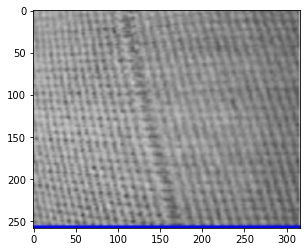

In [ ]:
image=cv2.imread('linesDetected.jpg')
plt.imshow(image)
plt.show()

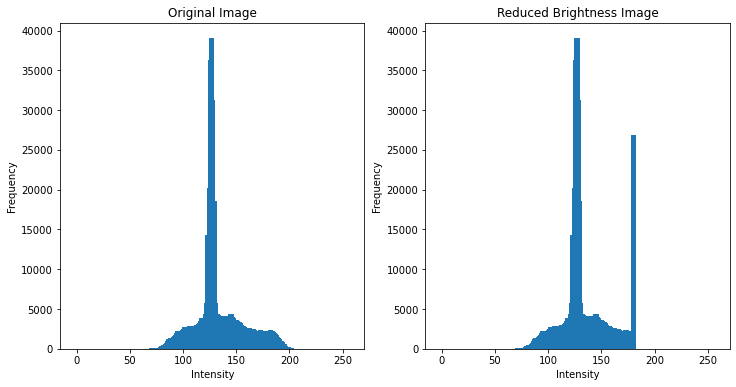

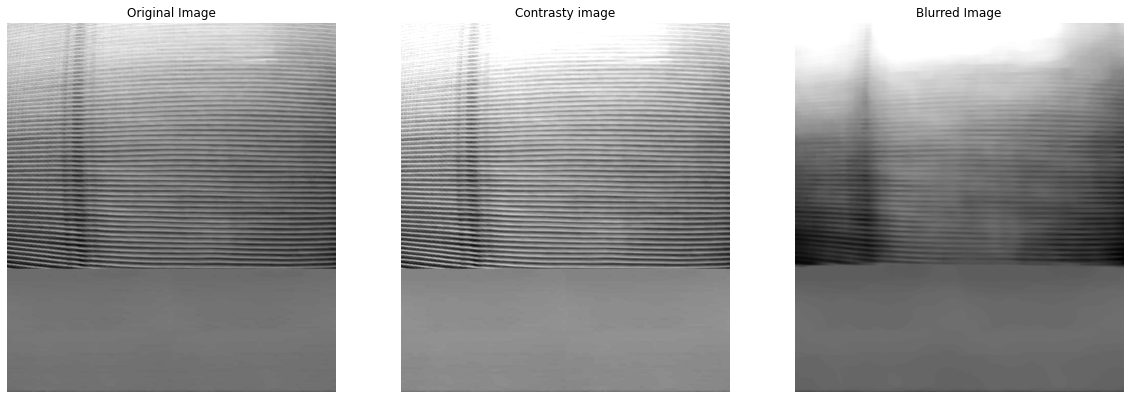

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(old_image, new_image, title_old="Original Image", title_new="New Image"):
    intensity_values = np.array([x for x in range(256)])
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image], [0], None, [256], [0, 256])[:, 0], width=5)
    plt.title(title_old)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image], [0], None, [256], [0, 256])[:, 0], width=5)
    plt.title(title_new)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Load a grayscale image
image = cv2.imread(r'c:\Users\Aditya\Downloads\Knitsmartdata\test_dataset\Minor_default\6.jpg', cv2.IMREAD_GRAYSCALE)

# Adjust the brightness using a threshold
_, reduced_brightness = cv2.threshold(image, 180, 220, cv2.THRESH_TRUNC)

# Apply a median blur
blurred = cv2.medianBlur(reduced_brightness, 25)

# Plot histograms of the original and processed images
plot_hist(image, reduced_brightness, title_old="Original Image", title_new="Reduced Brightness Image")

# Display the original, brightness reduced, and blurred images
plt.figure(figsize=(20, 20))

# Correctly display the original image
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Correctly display the brightness reduced image
plt.subplot(132)
plt.imshow(reduced_brightness, cmap='gray')
plt.title('Contrasty image')
plt.axis('off')

# Correctly display the blurred image
plt.subplot(133)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()
